# Archive

In [28]:
import numpy as np
import os

# Directory containing the embeddings
embeddings_dir = "/home/alex/rl-starter-files/storage/RedBlueDoors_transformer_seq_new4"

# List all files in the directory that match the pattern 'embeddings_{int}.npy'
embedding_files = [f for f in os.listdir(embeddings_dir) if f.startswith("embeddings_") and f.endswith(".npy")]
embedding_files = sorted(embedding_files, key=lambda x: int(x.split("_")[1].split(".")[0]))
print(embedding_files)

# Initialize a list to store all embeddings
all_embeddings = []

# Loop through the files and load the embeddings
for file in embedding_files:
    file_path = os.path.join(embeddings_dir, file)
    embeddings = np.load(file_path)
    all_embeddings.append(embeddings)
    print(embeddings.shape)

# Convert list of embeddings to a numpy array
all_embeddings = np.concatenate(all_embeddings, axis=0)

# Print the shape of the concatenated embeddings
print("Shape of all embeddings:", all_embeddings.shape)


['embeddings_0.npy', 'embeddings_1.npy', 'embeddings_2.npy', 'embeddings_3.npy', 'embeddings_4.npy', 'embeddings_5.npy', 'embeddings_6.npy', 'embeddings_7.npy', 'embeddings_8.npy', 'embeddings_9.npy', 'embeddings_10.npy', 'embeddings_11.npy', 'embeddings_12.npy', 'embeddings_13.npy', 'embeddings_14.npy', 'embeddings_15.npy', 'embeddings_16.npy', 'embeddings_17.npy', 'embeddings_18.npy', 'embeddings_19.npy']
(14, 4, 64)
(30, 4, 64)
(1, 4, 64)
(24, 4, 64)
(18, 4, 64)
(19, 4, 64)
(23, 4, 64)
(16, 4, 64)
(49, 4, 64)
(29, 4, 64)
(18, 4, 64)
(22, 4, 64)
(24, 4, 64)
(2, 4, 64)
(28, 4, 64)
(21, 4, 64)
(21, 4, 64)
(37, 4, 64)
(29, 4, 64)
(27, 4, 64)
Shape of all embeddings: (452, 4, 64)


In [29]:
embeddings.shape

(27, 4, 64)

In [30]:
map_embeddings = all_embeddings.reshape(-1, 4*64)
map_embeddings.shape

(452, 256)

In [51]:
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

def visualize_embeddings(map_embeddings, color_labels):
    # UMAP visualization
    umap_reducer = umap.UMAP()
    umap_embedding = umap_reducer.fit_transform(map_embeddings)
    # UMAP visualization over time with color
    plt.figure(figsize=(12, 10))
    plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=color_labels, cmap='Spectral', s=5)
    plt.colorbar(label='Time Point')
    plt.title('UMAP projection of the embeddings over time', fontsize=24)
    plt.show()

    # t-SNE visualization over time with color
    tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
    tsne_results = tsne.fit_transform(map_embeddings)
    plt.figure(figsize=(12, 10))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=color_labels, cmap='Spectral', s=5)
    plt.colorbar(label='Time Point')
    plt.title('t-SNE projection of the embeddings over time', fontsize=24)
    plt.show()


# Active

In [27]:
import json

# Directory containing the embeddings
lstm_embeddings_file = "/home/alex/rl-starter-files/storage/RedBlueDoors_lstm_seq16_update/RedBlueDoors_lstm_seq16_update_export_map.json"
transformer_embeddings_file = "/home/alex/rl-starter-files/storage/RedBlueDoors_transformer_1layer_seq16_update/RedBlueDoors_transformer_1layer_seq16_update_export_map.json"
# mamba_embeddings_file = "/home/alex/rl-starter-files/storage/RedBlueDoors_mamba_1layer_seq16_update/RedBlueDoors_mamba_1layer_seq16_update_export_map.json"
mamba_embeddings_file = "/home/alex/rl-starter-files/storage/RedBlueDoors_mamba_1layer_seq16_update/RedBlueDoors_mamba_1layer_seq16_update_export_map_status1003k.pt.json"

transformer_hidden_state_dim = 16 * 64
lstm_hidden_state_dim = 2 * 64
mamba_hidden_state_dim = 16 * 64

# read JSON
with open(lstm_embeddings_file, 'r') as f:
    lstm_embeddings_json = json.load(f)
with open(transformer_embeddings_file, 'r') as f:
    transformer_embeddings_json = json.load(f)
with open(mamba_embeddings_file, 'r') as f:
    mamba_embeddings_json = json.load(f)

action_map = {
    0: "Turn left",
    1: "Turn right",
    2: "Move forward",
    3: "Pickup = Unused",
    4: "Drop = Unused",
    5: "Toggle/activate an object",
    6: "Done = Unused"
}
for entry in lstm_embeddings_json:
    entry['action_text'] = action_map[entry['action']]
    entry['redOpened'] = "Red door opened" if entry['redOpened'] else "Red door closed"
for entry in transformer_embeddings_json:
    entry['action_text'] = action_map[entry['action']]
    entry['redOpened'] = "Red door opened" if entry['redOpened'] else "Red door closed"
for entry in mamba_embeddings_json:
    entry['action_text'] = action_map[entry['action']]
    entry['redOpened'] = "Red door opened" if entry['redOpened'] else "Red door closed"



## Visualization

In [4]:
import plotly.express as px
import umap
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

def visualize_embeddings_interactive(embeddings_json, hidden_state_dim, colorby="episode"):
    df = pd.DataFrame(embeddings_json)
    # mapping_embeddings = np.array(df['embedding'].tolist())
    mapping_embeddings = np.array(df['embedding'].tolist()).reshape(-1, hidden_state_dim)
    hover_data = list(df.columns)
    hover_data.remove('embedding')

    # UMAP visualization
    umap_reducer = umap.UMAP()
    umap_embedding = umap_reducer.fit_transform(mapping_embeddings)

    df['UMAP_1'], df['UMAP_2'] = umap_embedding[:, 0], umap_embedding[:, 1]

    df = df.sort_values(by=['episode', 'timestep'])
    # # Plot using Plotly with lines connecting subsequent points
    # fig_umap = px.line(df, x='UMAP_1', y='UMAP_2', color='episode',
    #                    hover_data=hover_data, line_group="episode",
    #                    title='UMAP projection of the embeddings over time')
    # fig_umap.add_trace(
    # px.scatter(df, x='UMAP_1', y='UMAP_2', color=colorby,
    #            hover_data=hover_data).data[0]
    # fig_umap.show()

    fig_umap = px.scatter(df, x='UMAP_1', y='UMAP_2', color=colorby,
                hover_data=hover_data,
                title='UMAP projection of the embeddings over time').show()

    # t-SNE visualization
    tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
    tsne_results = tsne.fit_transform(mapping_embeddings)
    df['t-SNE_1'], df['t-SNE_2'] = tsne_results[:, 0], tsne_results[:, 1]
    # Plot using Plotly
    fig_tsne = px.scatter(df, x='t-SNE_1', y='t-SNE_2', color=colorby,
                          hover_data=hover_data,
                          title='t-SNE projection of the embeddings over time')
    fig_tsne.show()

/home/alex/miniconda3/envs/minigrid/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
filtered_embeddings_json = [entry for entry in mamba_embeddings_json if entry['episode'] < 21]

visualize_embeddings_interactive(filtered_embeddings_json, mamba_hidden_state_dim, colorby="redOpened")



[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2520 samples in 0.001s...
[t-SNE] Computed neighbors for 2520 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2520
[t-SNE] Computed conditional probabilities for sample 2000 / 2520
[t-SNE] Computed conditional probabilities for sample 2520 / 2520
[t-SNE] Mean sigma: 0.112674
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.880516
[t-SNE] KL divergence after 300 iterations: 3.515475


## Linear Probes

In [5]:
import pandas as pd
import numpy as np

df_lstm = pd.DataFrame(lstm_embeddings_json)
df_transformer = pd.DataFrame(transformer_embeddings_json)
df_mamba = pd.DataFrame(mamba_embeddings_json)


In [6]:
from sklearn.linear_model import LogisticRegression, LinearRegression
def train_linear_probe(embeddings, labels, label_name):
    # Create a logistic regression model for the linear probe
    linear_probe = LogisticRegression(max_iter=1000, random_state=42)
    # linear_probe = LinearRegression()

    # Fit the model using the reshaped embeddings as features and direction as the target
    linear_probe.fit(embeddings, labels)

    # Print the accuracy of the linear probe
    print(f"Accuracy of {label_name} linear probe:", linear_probe.score(embeddings, labels))

    return linear_probe



### LSTM

In [34]:
hidden_state_dim = 128
lstm_embedding = np.array(df_lstm['embedding'].tolist()).reshape(-1, hidden_state_dim)
lstm_direction = df_lstm['direction']
lstm_redOpen = df_lstm['redOpened']

train_linear_probe(lstm_embedding, lstm_direction, 'direction')
train_linear_probe(lstm_embedding, lstm_redOpen, 'redOpen')

Accuracy of direction linear probe: 0.9508196721311475
Accuracy of redOpen linear probe: 0.9918032786885246


### Transformer 16

In [42]:
hidden_state_dim = 16 * 64
transformer_embedding = np.array(df_transformer['embedding'].tolist()).reshape(-1, hidden_state_dim)
transformer_direction = df_transformer['direction']
transformer_redOpen = df_transformer['redOpened']

train_linear_probe(transformer_embedding, transformer_direction, 'direction')
train_linear_probe(transformer_embedding, transformer_redOpen, 'redOpen')

Accuracy of direction linear probe: 0.8827433628318584
Accuracy of redOpen linear probe: 0.9601769911504425


In [37]:
transformer_embedding.shape

(1808, 256)

### Mamba 16

In [26]:
hidden_state_dim = 16 * 64
mamba_embedding = np.array(df_mamba['embedding'].tolist()).reshape(-1, hidden_state_dim)
mamba_direction = df_mamba['direction']
mamba_redOpen = df_mamba['redOpened']

train_linear_probe(mamba_embedding, mamba_direction, 'direction')
train_linear_probe(mamba_embedding, mamba_redOpen, 'redOpen')

Accuracy of direction linear probe: 0.8970099667774086
Accuracy of redOpen linear probe: 0.9833887043189369


In [32]:
hidden_state_dim = 16 * 64
mamba_embedding = np.array(df_mamba['embedding'].tolist()).reshape(-1, hidden_state_dim)
mamba_direction = df_mamba['direction']
mamba_redOpen = df_mamba['redOpened']

train_linear_probe(mamba_embedding, mamba_direction, 'direction')
train_linear_probe(mamba_embedding, mamba_redOpen, 'redOpen')

Accuracy of direction linear probe: 0.4984126984126984
Accuracy of redOpen linear probe: 0.7757936507936508


In [3]:
import json

# Directory containing the embeddings
lstm_embeddings_file = "/home/alex/rl-starter-files/storage/RedBlueDoors_lstm_seq16_update/RedBlueDoors_lstm_seq16_update_export_map.json"
transformer_embeddings_file = "/home/alex/rl-starter-files/storage/RedBlueDoors_transformer_1layer_seq16_update/RedBlueDoors_transformer_1layer_seq16_update_export_map.json"
# mamba_embeddings_file = "/home/alex/rl-starter-files/storage/RedBlueDoors_mamba_1layer_seq16_update/RedBlueDoors_mamba_1layer_seq16_update_export_map.json"
mamba_embeddings_file = "/home/alex/rl-starter-files/storage/MemoryNoops46_3s_mamba_1layer_seq16/MemoryNoops46_3s_mamba_1layer_seq16_export_map.json"

transformer_hidden_state_dim = 16 * 64
lstm_hidden_state_dim = 2 * 64
mamba_hidden_state_dim = 16 * 64

# read JSON
with open(lstm_embeddings_file, 'r') as f:
    lstm_embeddings_json = json.load(f)
with open(transformer_embeddings_file, 'r') as f:
    transformer_embeddings_json = json.load(f)
with open(mamba_embeddings_file, 'r') as f:
    mamba_embeddings_json = json.load(f)

action_map = {
    0: "Turn left",
    1: "Turn right",
    2: "Move forward",
    3: "Pickup = Unused",
    4: "Drop = Unused",
    5: "Toggle/activate an object",
    6: "Done = Unused"
}
for entry in lstm_embeddings_json:
    entry['action_text'] = action_map[entry['action']]
    entry['redOpened'] = "Red door opened" if entry['redOpened'] else "Red door closed"
for entry in transformer_embeddings_json:
    entry['action_text'] = action_map[entry['action']]
    entry['redOpened'] = "Red door opened" if entry['redOpened'] else "Red door closed"
for entry in mamba_embeddings_json:
    entry['action_text'] = action_map[entry['action']]
    entry['redOpened'] = "Red door opened" if entry['redOpened'] else "Red door closed"

df_mamba = pd.DataFrame(mamba_embeddings_json)


In [6]:
visualize_embeddings_interactive(mamba_embeddings_json, mamba_hidden_state_dim, colorby="greenKey")

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 183 samples in 0.000s...
[t-SNE] Computed neighbors for 183 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 183 / 183
[t-SNE] Mean sigma: 1.089919
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.114216
[t-SNE] KL divergence after 300 iterations: 0.419770


In [7]:
hidden_state_dim = 16 * 64
mamba_embedding = np.array(df_mamba['embedding'].tolist()).reshape(-1, hidden_state_dim)
mamba_direction = df_mamba['direction']
mamba_greenKey = df_mamba['greenKey']

train_linear_probe(mamba_embedding, mamba_direction, 'direction')
green_probe = train_linear_probe(mamba_embedding, mamba_greenKey, 'greenKey')

Accuracy of direction linear probe: 0.9926470588235294
Accuracy of greenKey linear probe: 0.8713235294117647


In [8]:
# green_probe.predict_proba(mamba_embedding[0].reshape(1, -1))
df_mamba['greenKey_prob'] = np.array(green_probe.predict_proba(mamba_embedding))[:, 1]
# df_mamba['greenKey_prob'] = green_probe.predict(mamba_embedding)
# df_mamba['greenKey_prob']


In [40]:
# Calculate the correlation between 'greenKey_prob' and 'greenKey'
correlation = df_mamba['greenKey_prob'].corr(df_mamba['greenKey'])
print(f"Correlation between 'greenKey_prob' and 'greenKey': {correlation}")


Correlation between 'greenKey_prob' and 'greenKey': 0.8115488061444351


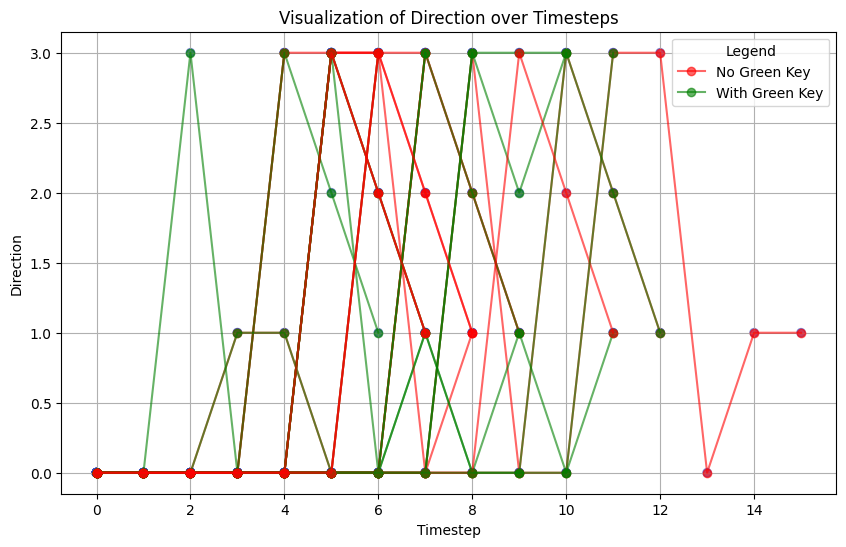

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'direction' over timesteps, colored by 'greenKey', with lines connecting dots of the same episode
plt.figure(figsize=(10, 6))
for episode in df_mamba['episode'].unique():
    episode_data = df_mamba[df_mamba['episode'] == episode]
    plt.plot(episode_data['timestep'], episode_data['direction'], '-o', alpha=0.6, label=f'Episode {episode}', color="green" if episode_data['greenKey'].iloc[0] else "red")
    plt.scatter(episode_data['timestep'], episode_data['direction'], c=episode_data['greenKey'], cmap='coolwarm', alpha=0.6)
plt.title('Visualization of Direction over Timesteps')
plt.xlabel('Timestep')
plt.ylabel('Direction')
plt.grid(True)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=["No Green Key", "With Green Key"], title='Legend')
plt.show()


In [37]:
# Filter episodes where 'direction' equals 2 at least once
episodes_with_direction_2 = df_mamba[df_mamba['direction'] == 2]['episode'].unique()
df_lookback = df_mamba[df_mamba['episode'].isin(episodes_with_direction_2)]

# Calculate the difference in 'greenKey_prob' for timesteps with direction==2 and the timestep before it
df_lookback['prev_greenKey_prob'] = df_lookback['greenKey_prob'].shift(1)
df_direction_2 = df_lookback[df_lookback['direction'] == 2]
df_direction_2['greenKey_prob_diff'] = df_direction_2['greenKey_prob'] - df_direction_2['prev_greenKey_prob']
print("Differences in 'greenKey_prob' for timesteps with direction==2 and the previous timestep:")
print(df_direction_2[['timestep', 'greenKey_prob_diff']])

# Calculate the average 'greenKey_prob_diff' grouped by 'greenKey' values (0 and 1)
average_diff_by_greenKey = df_direction_2.groupby(df_direction_2['greenKey'])['greenKey_prob_diff'].mean()
print("Average 'greenKey_prob_diff' grouped by 'greenKey':")
print(average_diff_by_greenKey)


Differences in 'greenKey_prob' for timesteps with direction==2 and the previous timestep:
     timestep  greenKey_prob_diff
13          5           -0.020404
67          8           -0.002846
80         11           -0.077159
89          7           -0.056365
134         8           -0.046261
161         8            0.005099
171         6            0.074720
179         6           -0.136696
192         9           -0.008253
194        11            0.013677
208         6           -0.090661
241        10           -0.100988
262         7            0.026241
270         6           -0.037151
Average 'greenKey_prob_diff' grouped by 'greenKey':
greenKey
False   -0.048149
True    -0.011976
Name: greenKey_prob_diff, dtype: float64


/tmp/ipykernel_3088086/1437898304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lookback['prev_greenKey_prob'] = df_lookback['greenKey_prob'].shift(1)
/tmp/ipykernel_3088086/1437898304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direction_2['greenKey_prob_diff'] = df_direction_2['greenKey_prob'] - df_direction_2['prev_greenKey_prob']


/tmp/ipykernel_3088086/241900307.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(episode_data['timestep'], episode_data['greenKey_prob'], c=colors, cmap='viridis', alpha=1)


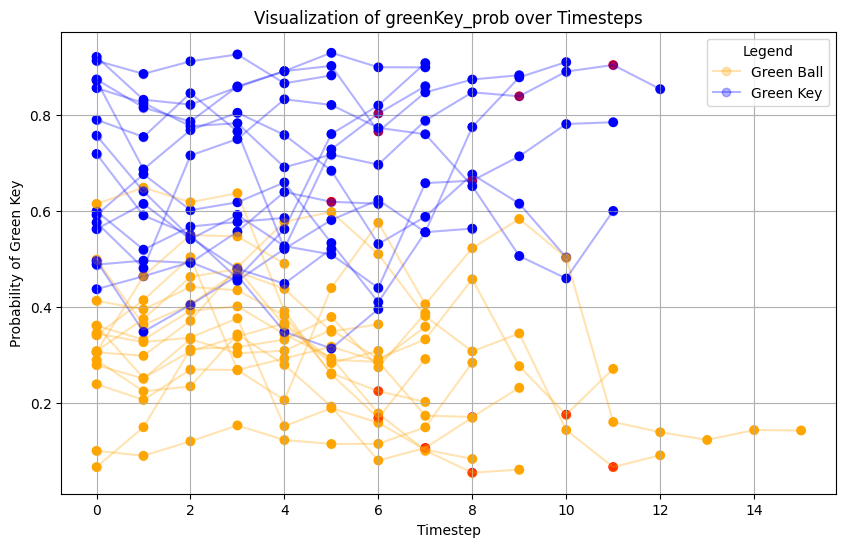

In [35]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'greenKey_prob' over timesteps, colored by 'greenKey', with lines connecting dots of the same episode
plt.figure(figsize=(10, 6))
for episode in df_mamba['episode'].unique():
    episode_data = df_mamba[df_mamba['episode'] == episode]
    colors = ["red" if d_t == 2 else ("blue" if episode_data['greenKey'].iloc[0] else "orange") for d_t in episode_data['direction']]
    plt.plot(episode_data['timestep'], episode_data['greenKey_prob'], '-o', alpha=0.3, label=f'Episode {episode}', color="blue" if episode_data['greenKey'].iloc[0] else "orange")
    plt.scatter(episode_data['timestep'], episode_data['greenKey_prob'], c=colors, cmap='viridis', alpha=1)
plt.title('Visualization of greenKey_prob over Timesteps')
plt.xlabel('Timestep')
plt.ylabel('Probability of Green Key')
plt.grid(True)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=["Green Ball", "Green Key"], title='Legend')

# plt.legend(title='Episode')
plt.show()


In [72]:
mamba_direction = pd.DataFrame(mamba_direction)
mamba_greenKey = pd.DataFrame(mamba_greenKey)
mamba_greenBall = pd.DataFrame(df_mamba['greenBall'])
mamba_greenKey_prob = pd.DataFrame(df_mamba['greenKey_prob'])

def train_reverse_probe_cca(y, X, y_name):
    """
    Train a reverse probe using Canonical Correlation Analysis (CCA) from y to X.
    
    Parameters:
    y (pd.Series): Target variable.
    X (np.ndarray): Input features.
    y_name (str): Name of the target variable for logging purposes.
    
    Returns:
    cca (CCA): Trained CCA model.
    """
    from sklearn.cross_decomposition import CCA
    from sklearn.preprocessing import StandardScaler
    
    # Ensure y is in the correct shape (n_samples, n_features)
    # y = y.reshape(-1, 1)
    
    # Standardize the features
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)
    
    # Initialize and fit CCA
    cca = CCA(n_components=1)
    cca.fit(X_scaled, y_scaled)

    # Print the correlation score between the canonical variables
    print("Correlation score between canonical variables:", cca.score(X_scaled, y_scaled))
    
    print(f"CCA model trained for reverse probing from {y_name} to embeddings.")
    return cca

# Train a reverse CCA probe from mamba_greenKey to mamba_embedding
reverse_probe_cca = train_reverse_probe_cca(mamba_greenKey, mamba_embedding, 'greenKey')
reverse_probe_cca = train_reverse_probe_cca(mamba_embedding, mamba_greenKey, 'greenKey')
reverse_probe_cca = train_reverse_probe_cca(mamba_greenKey_prob, mamba_embedding, 'greenKey_prob')



Correlation score between canonical variables: 0.9917650173592154
CCA model trained for reverse probing from greenKey to embeddings.
Correlation score between canonical variables: 0.00553341477235067
CCA model trained for reverse probing from greenKey to embeddings.
Correlation score between canonical variables: -0.06904021066747146
CCA model trained for reverse probing from greenKey_prob to embeddings.


In [69]:
print(mamba_greenKey.shape)
print(mamba_embedding.shape)



(183, 1)
(183, 1024)


In [115]:
from sklearn.ensemble import RandomForestRegressor

mamba_direction = pd.DataFrame(mamba_direction)
mamba_greenKey = pd.DataFrame(mamba_greenKey)
mamba_greenBall = pd.DataFrame(df_mamba['greenBall'])
mamba_greenKey_prob = pd.DataFrame(df_mamba['greenKey_prob'])

def train_reverse_probe_ridge(y, X, y_name):
    """
    Train a reverse probe using Random Forest from y to X.
    
    Parameters:
    y (pd.Series): Target variable.
    X (np.ndarray): Input features.
    y_name (str): Name of the target variable for logging purposes.
    
    Returns:
    rf (RandomForestRegressor): Trained Random Forest model.
    """
    from sklearn.preprocessing import StandardScaler
    
    # Ensure y is in the correct shape (n_samples,)
    # y = y.ravel()
    
    # Standardize the features
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    scaler_y = StandardScaler()
    y_scaled = scaler_y.fit_transform(y)
    # Initialize and fit Random Forest
    from sklearn.linear_model import LinearRegression, Ridge
    # rf = LinearRegression()
    rf = Ridge(alpha=1.0)
    halfway = len(X_scaled)//2
    rf.fit(X_scaled, y_scaled)
    
    # Print the R^2 score of the model
    print("R^2 score of the model:", rf.score(X_scaled, y_scaled))
    
    print(f"Random Forest model trained for reverse probing from {y_name} to embeddings.")
    return rf

# Train a reverse Random Forest probe from mamba_greenKey to mamba_embedding
reverse_probe_rf = train_reverse_probe_ridge(mamba_greenKey, mamba_embedding, 'greenKey')
reverse_probe_rf = train_reverse_probe_ridge(mamba_embedding, mamba_greenKey, 'greenKey')
reverse_probe_rf = train_reverse_probe_ridge(mamba_embedding, mamba_greenKey_prob, 'greenKey_prob')
reverse_probe_rf = train_reverse_probe_ridge(mamba_greenKey_prob, mamba_embedding, 'greenKey_prob')


R^2 score of the model: 0.999816836116146
Random Forest model trained for reverse probing from greenKey to embeddings.
R^2 score of the model: 0.005588921305707981
Random Forest model trained for reverse probing from greenKey to embeddings.
R^2 score of the model: 0.011562837199621954
Random Forest model trained for reverse probing from greenKey_prob to embeddings.
R^2 score of the model: 0.9999876433076369
Random Forest model trained for reverse probing from greenKey_prob to embeddings.


In [117]:
embeddings_file = "/home/alex/rl-starter-files/storage/MemoryNoops46_3s_mamba_1layer_seq16/MemoryNoops46_3s_mamba_1layer_seq16_export_map.json"

def linear_probe_wrapper(embeddings_file):
    transformer_hidden_state_dim = 16 * 64
    lstm_hidden_state_dim = 2 * 64
    mamba_hidden_state_dim = 16 * 64

    if "transformer" in embeddings_file:
        hidden_state_dim = transformer_hidden_state_dim
    elif "lstm" in embeddings_file:
        hidden_state_dim = lstm_hidden_state_dim
    elif "mamba" in embeddings_file:
        hidden_state_dim = mamba_hidden_state_dim

    # read JSON
    with open(embeddings_file, 'r') as f:
        embeddings_json = json.load(f)

    df = pd.DataFrame(embeddings_json)
    embeddings = np.array(df['embedding'].tolist()).reshape(-1, hidden_state_dim)
    greenKey = pd.DataFrame(df['greenKey'])

    green_probe = train_linear_probe(embeddings, greenKey, 'greenKey')
    df['greenKey_prob'] = np.array(green_probe.predict_proba(embeddings))[:, 1]
    greenKey_prob = pd.DataFrame(df['greenKey_prob'])

    train_reverse_probe_ridge(embeddings, greenKey, 'greenKey')
    train_reverse_probe_ridge(embeddings, greenKey_prob, 'greenKey_prob')


In [118]:
linear_probe_wrapper(embeddings_file)

Accuracy of greenKey linear probe: 0.907103825136612
R^2 score of the model: 0.005588921305707981
Random Forest model trained for reverse probing from greenKey to embeddings.
R^2 score of the model: 0.011562837199621954
Random Forest model trained for reverse probing from greenKey_prob to embeddings.


/home/alex/miniconda3/envs/minigrid/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [120]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.2 MB/s eta 0:00:00


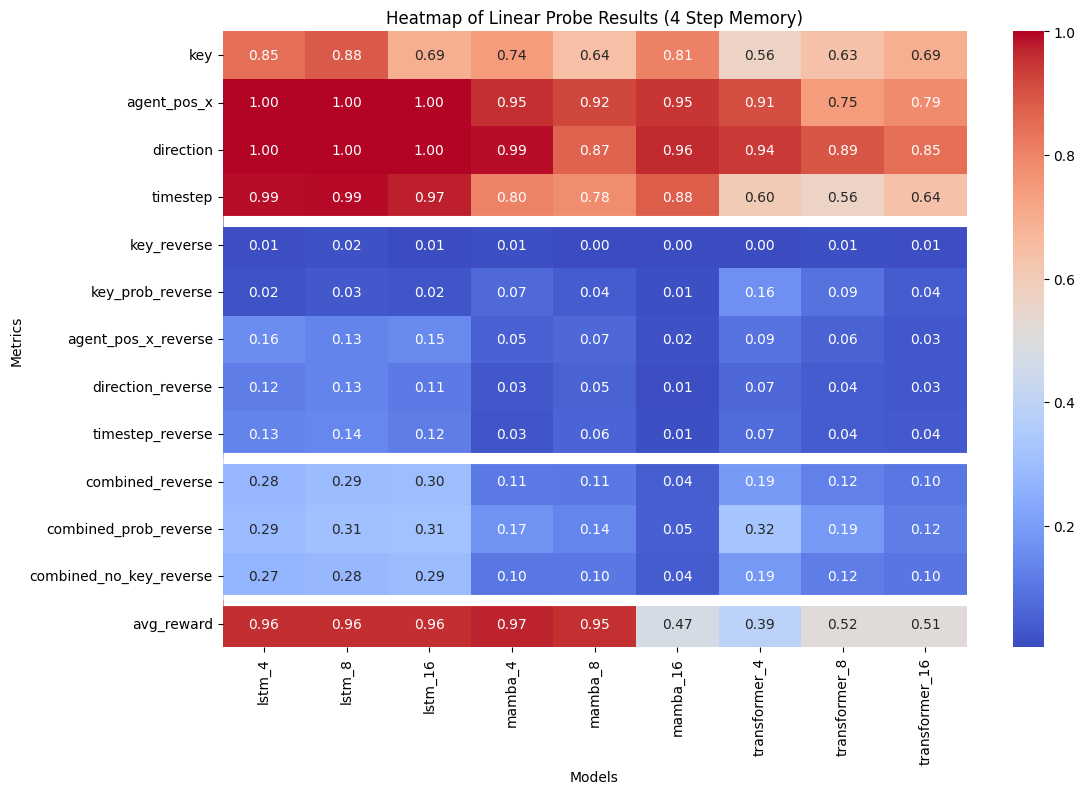

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
results_df = pd.read_csv("/home/alex/rl-starter-files/linear_probe_results_4.csv", index_col=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a small gap between the 4th and 5th row
plt.hlines(4, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)
plt.hlines(9, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)
plt.hlines(12, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)

plt.title('Heatmap of Linear Probe Results (4 Step Memory)')
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.show()


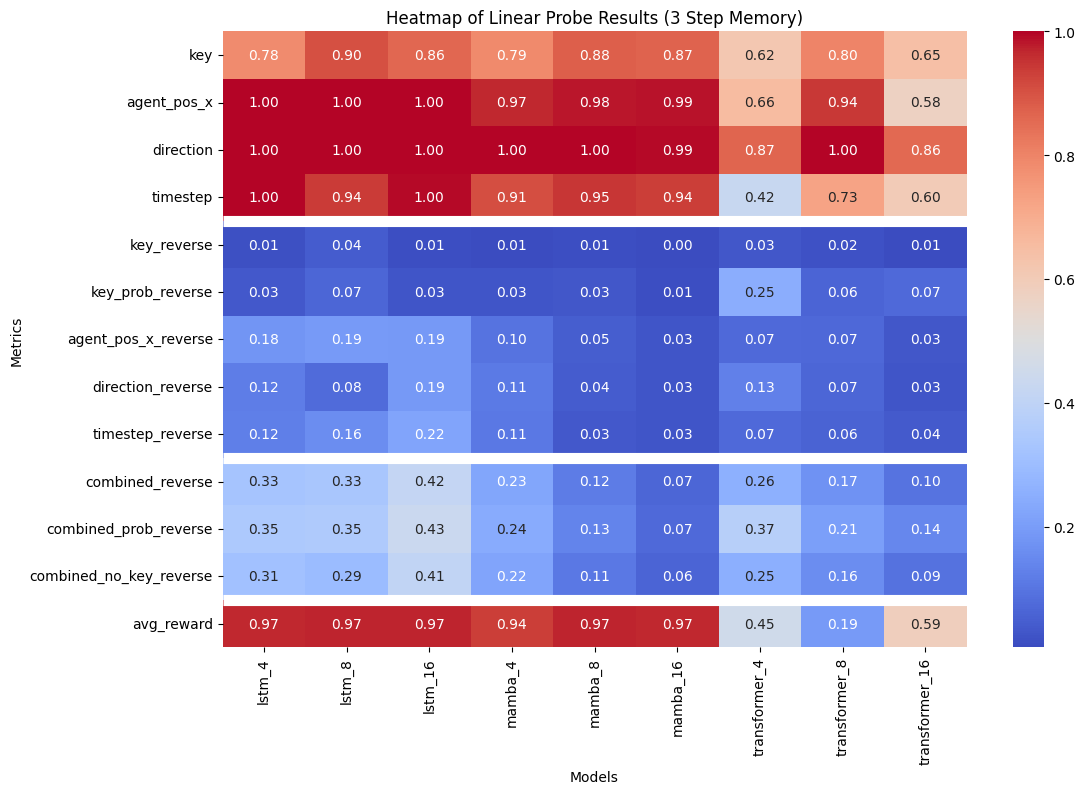

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
results_df = pd.read_csv("/home/alex/rl-starter-files/linear_probe_results_3.csv", index_col=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a small gap between the 4th and 5th row
plt.hlines(4, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)
plt.hlines(9, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)
plt.hlines(12, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)

plt.title('Heatmap of Linear Probe Results (3 Step Memory)')
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.show()


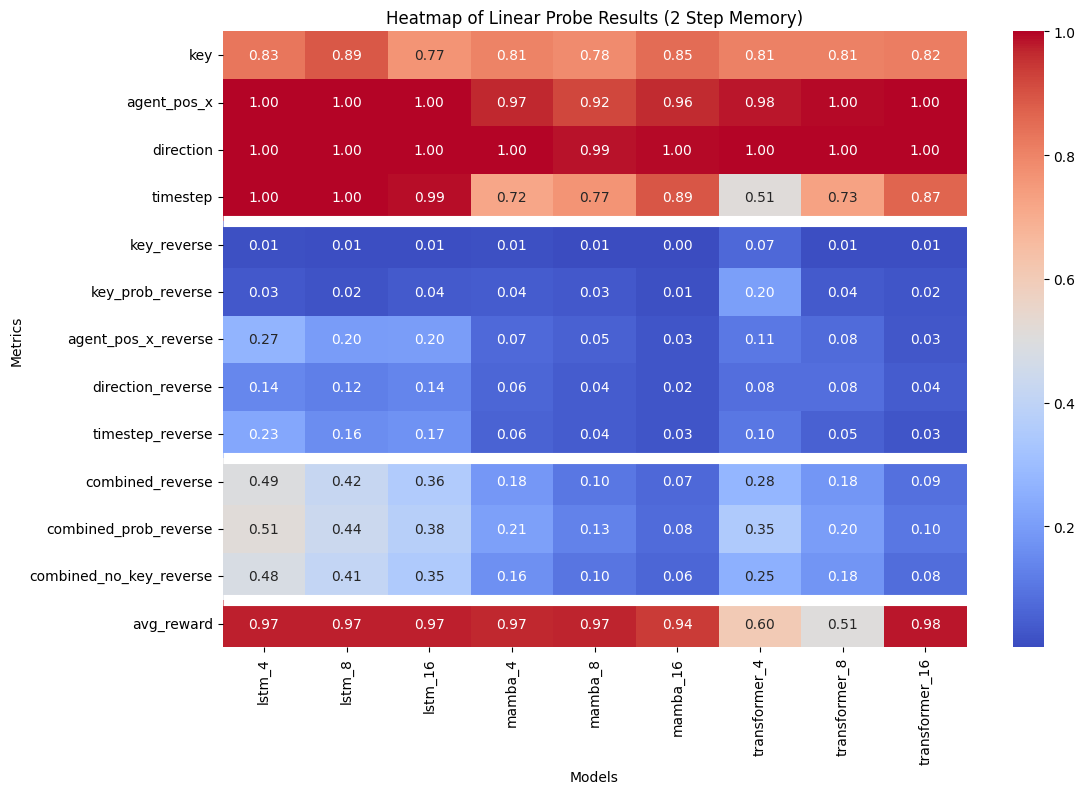

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
results_df = pd.read_csv("/home/alex/rl-starter-files/linear_probe_results_.csv", index_col=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a small gap between the 4th and 5th row
plt.hlines(4, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)
plt.hlines(9, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)
plt.hlines(12, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)

plt.title('Heatmap of Linear Probe Results (2 Step Memory)')
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a DataFrame
results_df = pd.read_csv("/home/alex/rl-starter-files/linear_probe_results_mlp.csv", index_col=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a small gap between the 4th and 5th row
plt.hlines(4, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)
plt.hlines(9, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)
plt.hlines(12, *plt.gca().get_xlim(), colors='white', linestyles='solid', linewidth=8)

plt.title('Heatmap of Linear Probe Results (2 Step Memory)')
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.show()